# 4.10 Coding Etiquette & Excel Reporting

### This script contains the following points:
- **01. Importing Libraries & Data**
- **02. Security Implications**
- **03. Defining the Regions & Analyzing Regional Spending Habits**
- **04. Identifying and Excluding Low-Activity Customers**
- **05. Creating Customer Profiles for Targeted Marketing**
- **06. Aggregating Max, Mean, and Min Variables on a Customer-Profile**
- **07. Combined Crosstab of Customer Profiles, Regions, Mean Days Since Prior Order, & Mean User Avg Price**
- **08. Comparing Customer Profiles with Regional Distribution**

## 01. Importing Libraries & Data

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Turn Path into a String & Assign Python Shortcut
path = '/Users/mgottlieb/Documents/Achievement 4'

In [3]:
# Import the last dataset export from task 4.9
df_findings = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
# Check the import
df_findings.shape

(32404859, 34)

In [5]:
# Check the import
df_findings.head()

,order_id,user_id,evaluation_status,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,days_since_prior_order_missing,product_id,add_to_cart_order,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,7.0,1,196,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,0,196,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,0,196,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,0,196,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,0,196,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


Data looks like it is correctly imported.

## 02. Security Implications

In [6]:
# This setting controls the maximum number of columns that pandas displays when outputting a DataFrame
pd.options.display.max_columns = None

Setting max_columns to None ensures that you can review all columns at once without needing to paginate or manually adjust the display settings each time.

**Personally Identifiable Information or PII** refers to information that can be used on its own or with other information to identify, contact, or locate a single person, or to identify an individual in context.\
\
In reviewing each column to confirm whether it contains PII or could be used in combination with other data to identify an individual,the most obvious columns are **first_name** and **surname**. I only need to retain PII that is necessary for your analysis, and having the name isn't necessary, however it might be handy to instead replace names with pseudonyms if user_id is not sufficient for the data analyzation and display.

In [7]:
# Drop 'first_name' and 'surname' columns
df_findings.drop(columns=['first_name', 'surname'], inplace=True)

In [8]:
# Check the data
df_findings.shape

(32404859, 32)

In [9]:
# Check the change
df_findings.head()

,order_id,user_id,evaluation_status,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,days_since_prior_order_missing,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,user_median_days,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,7.0,1,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423


**first_name** and **surname** are successfully dropped.

## 03. Defining the Regions & Analyzing Regional Spending Habits

I need to create lists defined for each of the four main U.S. regions: Northeast, Midwest, South, and West. Each list will contain the names of the states that belong to that respective region according the the provided article.

In [10]:
# Define lists of states for each region
northeast_region = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [11]:
# Assign regions based on the state using loc and isin
df_findings.loc[df_findings['state'].isin(northeast_region), 'region'] = 'Northeast'

In [12]:
df_findings.loc[df_findings['state'].isin(midwest_region), 'region'] = 'Midwest'

In [13]:
df_findings.loc[df_findings['state'].isin(south_region), 'region'] = 'South'

In [14]:
df_findings.loc[df_findings['state'].isin(west_region), 'region'] = 'West'

In [15]:
# Check for missing values in the 'region' column
missing_regions = df_findings['region'].isnull().sum()

In [16]:
missing_regions

0

No missing values for regions, so I can move on.

In [17]:
df_findings['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [18]:
# Check the data
df_findings.shape

(32404859, 33)

In [19]:
# Check to make sure this worked correctly
df_findings.sample(10)[['state', 'region']]

,state,region
5455107,Massachusetts,Northeast
18340880,District of Columbia,South
13653711,Illinois,Midwest
30523688,Minnesota,Midwest
25689564,Mississippi,South
8479440,Kentucky,South
26900039,New Jersey,Northeast
28769754,Wisconsin,Midwest
12005824,North Dakota,Midwest
1346204,Minnesota,Midwest


In [20]:
# Group the data by 'Region' and 'spending_flag' and count the number of entries in each group
region_spending_stats = df_findings.groupby(['region', 'spending_flag']).size().unstack(fill_value=0)

In [21]:
region_spending_stats

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


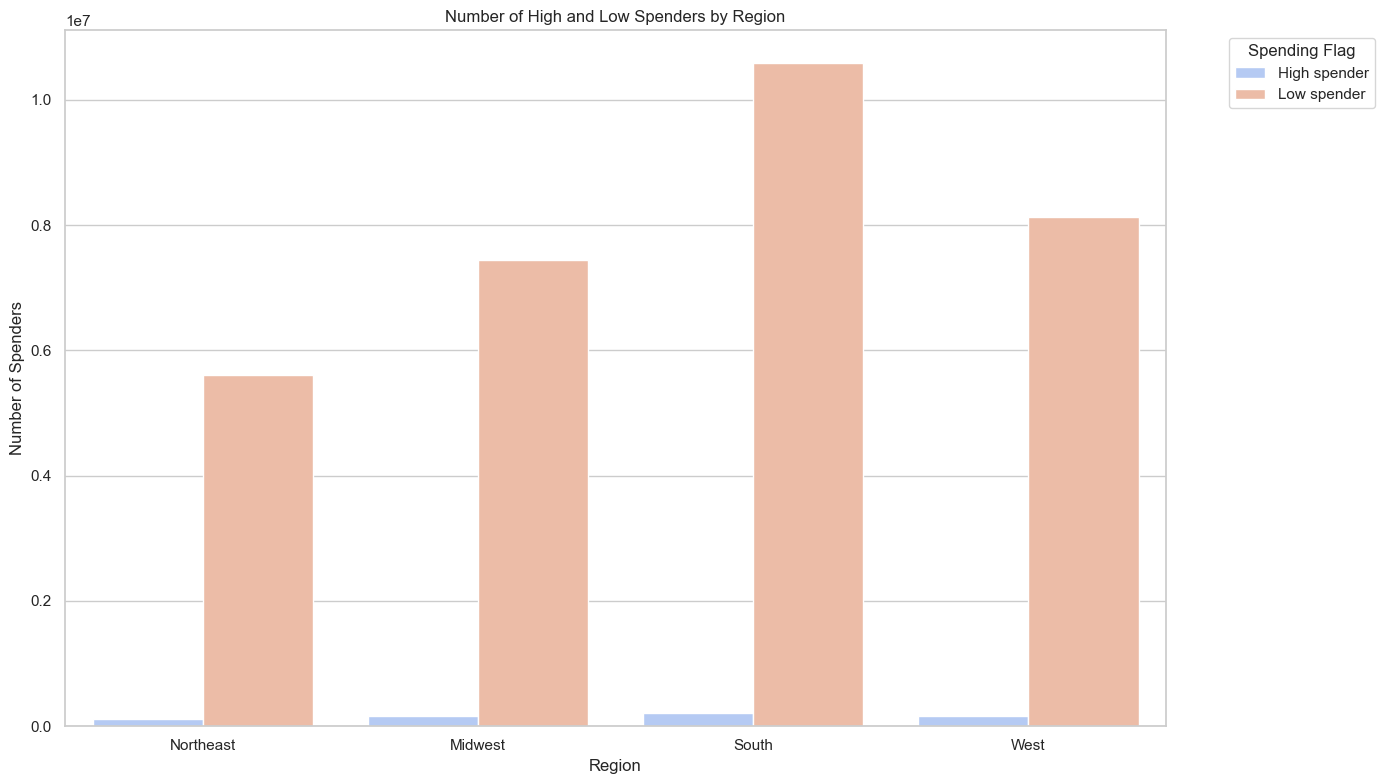

In [22]:
# Reorder the DataFrame by the specified order
order = ['Northeast', 'Midwest', 'South', 'West']
region_spending_stats = region_spending_stats.loc[order]

# Set the style for Seaborn
sns.set(style="whitegrid")

# Convert the DataFrame to long format for Seaborn
region_spending_stats_long = region_spending_stats.reset_index().melt(id_vars='region', var_name='Spending Flag', value_name='Count')

# Plotting the bar chart
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=region_spending_stats_long, x='region', y='Count', hue='Spending Flag', palette='coolwarm')
bar_plot.set_title('Number of High and Low Spenders by Region')
bar_plot.set_xlabel('Region')
bar_plot.set_ylabel('Number of Spenders')
bar_plot.legend(title='Spending Flag', bbox_to_anchor=(1.05, 1), loc='upper left')


# Save and show the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'number_of_high_and_low_spenders_by_region.png'), bbox_inches = 'tight')
plt.show()

### Analysis
Across all regions, the number of low spenders significantly exceeds the number of high spenders. This indicates a general trend where the majority of customers prefer to make lower-priced purchases. The South has the highest total numbers of both high and low spenders. This is either the most populated or most actively engaged region in terms of Instacart users. This is opposite to the Northeast which shows the lowest number of high and low spenders among the regions.

## 04. Identifying and Excluding Low-Activity Customers

In [23]:
# Using 'max_order' column, set 'exclusion_flag' based on 'max_order'
df_findings.loc[df_findings['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [24]:
df_findings.loc[df_findings['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [25]:
# Check the new column
df_findings.head()

,order_id,user_id,evaluation_status,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,days_since_prior_order_missing,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,user_median_days,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag
0,2539329,1,prior,1,2,8,7.0,1,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
1,2398795,1,prior,2,3,7,15.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
2,473747,1,prior,3,3,12,21.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
3,2254736,1,prior,4,4,7,29.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep
4,431534,1,prior,5,4,15,28.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep


In [26]:
# Count the number of each category in the 'exclusion_flag' column
exclusion_counts = df_findings['exclusion_flag'].value_counts()

In [27]:
exclusion_counts

exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In checking the numbers, 30964564 + 1440295 does in fact equal the total number of columns, 32404859.

In [28]:
# Filter the DataFrame to include only rows where the 'exclusion_flag' is 'Keep'
keep_customers = df_findings[df_findings['exclusion_flag'] == 'Keep']

In [29]:
# Check sample
keep_customers.shape

(30964564, 34)

This looks correct, I can now export this sample.

In [30]:
keep_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'keep_customers.pkl'))

## 05. Creating Customer Profiles for Targeted Marketing

### Step 1: Define Age Groups
Use loc to set the age group based on specific age thresholds.

In [31]:
keep_customers.loc[df_findings['age'] <= 25, 'age_group'] = 'Young Adult'

/var/folders/79/dbxtn02s0kzdngngl4z03wch0000gp/T/ipykernel_64789/860214523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keep_customers.loc[df_findings['age'] <= 25, 'age_group'] = 'Young Adult'


In [32]:
keep_customers.loc[(df_findings['age'] > 25) & (df_findings['age'] <= 40), 'age_group'] = 'Adult'

In [33]:
keep_customers.loc[(df_findings['age'] > 40) & (df_findings['age'] <= 55), 'age_group'] = 'Middle-Aged Adult'

In [34]:
keep_customers.loc[df_findings['age'] > 55, 'age_group'] = 'Senior'

In [35]:
# Check frequency of age_group and ensure no NaNs
keep_customers['age_group'].value_counts(dropna = False)

age_group
Senior               12508298
Middle-Aged Adult     7307833
Adult                 7283915
Young Adult           3864518
Name: count, dtype: int64

In [36]:
# Check data
keep_customers.shape

(30964564, 35)

### Step 2: Define Income Brackets
Assign income brackets based on the range of income.

In [37]:
keep_customers.loc[df_findings['income'] <= 30000, 'income_bracket'] = 'Low Income'

/var/folders/79/dbxtn02s0kzdngngl4z03wch0000gp/T/ipykernel_64789/458626935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keep_customers.loc[df_findings['income'] <= 30000, 'income_bracket'] = 'Low Income'


In [38]:
keep_customers.loc[(df_findings['income'] > 30000) & (df_findings['income'] <= 60000), 'income_bracket'] = 'Middle Income'

In [39]:
keep_customers.loc[(df_findings['income'] > 60000) & (df_findings['income'] <= 90000), 'income_bracket'] = 'Upper Middle Income'

In [40]:
keep_customers.loc[df_findings['income'] > 90000, 'income_bracket'] = 'High Income'

In [41]:
# Check frequency of income_bracket and ensure no NaNs
keep_customers['income_bracket'].value_counts(dropna = False)

income_bracket
High Income            17829832
Upper Middle Income     7331431
Middle Income           5609169
Low Income               194132
Name: count, dtype: int64

### Step 3: Define Number of Dependents
Categorize the number of dependents to reflect different life stages:

In [42]:
keep_customers.loc[keep_customers['n_dependants'] == 0, 'dependents'] = 'Single/No Dependents'

/var/folders/79/dbxtn02s0kzdngngl4z03wch0000gp/T/ipykernel_64789/1523990681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keep_customers.loc[keep_customers['n_dependants'] == 0, 'dependents'] = 'Single/No Dependents'


In [43]:
keep_customers.loc[keep_customers['n_dependants'].isin([1, 2]), 'dependents'] = 'One/Two Dependent'

In [44]:
keep_customers.loc[keep_customers['n_dependants'] >= 3, 'dependents'] = 'Three or More Dependents'

In [45]:
# Check frequency of dependents and ensure no NaNs
keep_customers['dependents'].value_counts(dropna = False)

dependents
One/Two Dependent           15452367
Three or More Dependents     7772516
Single/No Dependents         7739681
Name: count, dtype: int64

In [46]:
# Check the first few rows of the DataFrame to see the new variables
keep_customers[['age_group', 'income_bracket', 'dependents']].head()

,age_group,income_bracket,dependents
0,Adult,Middle Income,Three or More Dependents
1,Adult,Middle Income,Three or More Dependents
2,Adult,Middle Income,Three or More Dependents
3,Adult,Middle Income,Three or More Dependents
4,Adult,Middle Income,Three or More Dependents


### Step 4: Checking department_id Frequencies for Customer Profiling

Since one of the asks is to create a profiling variable based on certain goods in the “department_id” column, I am first checkign to see top 5 department_id's that are the most frequently purched and top 5 products.

In [47]:
# Get the frequency counts for the department_id column, including NaN values
keep_customers['department_id'].value_counts(dropna=False)

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

In [48]:
#Import the departments.csv dataset
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [49]:
#Checking the output of the import
df_dep.head()

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [50]:
# Transpose df_dep
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [51]:
df_dep_t = df_dep.T

In [52]:
df_dep_t

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [53]:
df_dep_t.reset_index()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [54]:
new_header = df_dep_t.iloc[0]

In [55]:
# Take the first row of df_dep_t for the header
new_header = df_dep_t.iloc[0]

In [56]:
new_header

0    department
Name: department_id, dtype: object

In [57]:
df_dep_t_new = df_dep_t[1:]

In [58]:
df_dep_t_new

,0
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [59]:
df_dep_t_new.columns = new_header

In [60]:
df_dep_t_new

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [61]:
dept_data_dict = df_dep_t_new.to_dict('index')

In [62]:
dept_data_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [63]:
# Create a mapping from department_id to department name
dept_map = {int(k): v['department'] for k, v in dept_data_dict.items()}

In [64]:
# Add a new column to keep_customers dataframe with the department names
keep_customers.loc[:, 'department'] = keep_customers['department_id'].map(dept_map)

/var/folders/79/dbxtn02s0kzdngngl4z03wch0000gp/T/ipykernel_64789/1805497706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keep_customers.loc[:, 'department'] = keep_customers['department_id'].map(dept_map)


In [65]:
# Check the new column
keep_customers.head()

,order_id,user_id,evaluation_status,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,days_since_prior_order_missing,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,user_median_days,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag,age_group,income_bracket,dependents,department
0,2539329,1,prior,1,2,8,7.0,1,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep,Adult,Middle Income,Three or More Dependents,beverages
1,2398795,1,prior,2,3,7,15.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep,Adult,Middle Income,Three or More Dependents,beverages
2,473747,1,prior,3,3,12,21.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep,Adult,Middle Income,Three or More Dependents,beverages
3,2254736,1,prior,4,4,7,29.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep,Adult,Middle Income,Three or More Dependents,beverages
4,431534,1,prior,5,4,15,28.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep,Adult,Middle Income,Three or More Dependents,beverages


In [66]:
# Check data
keep_customers.shape

(30964564, 38)

In [67]:
# Get the frequency counts for the department name column, including NaN values
keep_customers['department'].value_counts(dropna=False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

Check to see if numbers and departments mapped correctly, it seems correct.

In [68]:
# Get the frequency counts for the product_id column, including NaN values
keep_customers['product_id'].value_counts(dropna=False)

product_id
24852    453164
13176    366403
21137    255988
21903    231772
47209    206799
          ...  
13248         1
48063         1
4383          1
37057         1
9767          1
Name: count, Length: 49628, dtype: int64

In [69]:
keep_customers.shape[0]

30964564

In [70]:
# Import dataset products_checked.csv to get the name of the products
df_prods = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'products_checked.csv'), index_col = False)

In [71]:
# Checking the output of the import
df_prods.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices
0,0,1,Chocolate Sandwich Cookies,61,19,5.8
1,1,2,All-Seasons Salt,104,13,9.3
2,2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,4,5,Green Chile Anytime Sauce,5,13,4.3


In [73]:
# Create a data dictionary with only product_id and product_name
product_dict = df_prods.set_index('product_id')['product_name'].to_dict()

In [74]:
product_dict

{1: 'Chocolate Sandwich Cookies',
 2: 'All-Seasons Salt',
 3: 'Robust Golden Unsweetened Oolong Tea',
 4: 'Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce',
 5: 'Green Chile Anytime Sauce',
 6: 'Dry Nose Oil',
 7: 'Pure Coconut Water With Orange',
 8: "Cut Russet Potatoes Steam N' Mash",
 9: 'Light Strawberry Blueberry Yogurt',
 10: 'Sparkling Orange Juice & Prickly Pear Beverage',
 11: 'Peach Mango Juice',
 12: 'Chocolate Fudge Layer Cake',
 13: 'Saline Nasal Mist',
 14: 'Fresh Scent Dishwasher Cleaner',
 15: 'Overnight Diapers Size 6',
 16: 'Mint Chocolate Flavored Syrup',
 17: 'Rendered Duck Fat',
 18: 'Pizza for One Suprema  Frozen Pizza',
 19: 'Gluten Free Quinoa Three Cheese & Mushroom Blend',
 20: 'Pomegranate Cranberry & Aloe Vera Enrich Drink',
 21: 'Small & Medium Dental Dog Treats',
 22: 'Fresh Breath Oral Rinse Mild Mint',
 23: 'Organic Turkey Burgers',
 24: 'Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants',
 25: 'Salted Caramel Lean Protein & 

In [75]:
# Create a mapping from product_id to product_name
product_dict = df_prods.set_index('product_id')['product_name'].to_dict()

In [76]:
# Add a new column to keep_customers dataframe with the product names using .loc to avoid the warning
keep_customers.loc[:, 'product_name'] = keep_customers['product_id'].map(product_dict)

In [77]:
# Check the new column
keep_customers.head()

,order_id,user_id,evaluation_status,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,days_since_prior_order_missing,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,user_median_days,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag,age_group,income_bracket,dependents,department
0,2539329,1,prior,1,2,8,7.0,1,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep,Adult,Middle Income,Three or More Dependents,beverages
1,2398795,1,prior,2,3,7,15.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep,Adult,Middle Income,Three or More Dependents,beverages
2,473747,1,prior,3,3,12,21.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep,Adult,Middle Income,Three or More Dependents,beverages
3,2254736,1,prior,4,4,7,29.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep,Adult,Middle Income,Three or More Dependents,beverages
4,431534,1,prior,5,4,15,28.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Keep,Adult,Middle Income,Three or More Dependents,beverages


In [78]:
# Check data
keep_customers.shape

(30964564, 38)

In [79]:
# Get the frequency counts for the product name column, including NaN values
keep_customers['product_name'].value_counts(dropna=False)

product_name
Banana                                    453164
Bag of Organic Bananas                    366403
Organic Strawberries                      255988
Organic Baby Spinach                      231772
Organic Hass Avocado                      206799
                                           ...  
Cranberry Apple Crunch Protein Oatmeal         1
Bagels, Sliced, Cinnamon Raisin                1
Sugar Free Pecan Shortbread Cookies            1
Potato Bread                                   1
Rosemary Medium Asiago Cheese Wedge            1
Name: count, Length: 49628, dtype: int64

Check to see if numbers and product names mapped correctly, it seems correct.

## Creating a Data Checkpoint and Exporting Final Keep Customers Dataframe 
Dataframe exported in case of issues with the kernel, this will also be a necessary part of the data included with this report

In [80]:
keep_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_keep_customers_report.pkl'))

### Step 5: Create a User Sample with Relevant Columns
Selecting the columns that are most relevant for my analysis.

In [5]:
# Create a unique user_id sample with relevant columns
user_sample = final_keep_customers[['user_id', 'age_group', 'income_bracket', 'gender', 'fam_status', 'dependents', 'region', 'loyalty_flag', 'spending_flag', 'days_since_prior_order', 'user_avg_price', 'department', 'product_name']]

In [6]:
# Check number before
user_sample.shape[0]

30964564

In [7]:
# Remove duplicate rows in the user_sample to obtain a sample of all unique customers
user_sample = user_sample.drop_duplicates()

In [8]:
# Check number after
user_sample.shape[0]

24693637

In [9]:
# Check the dataframe
user_sample.head()

,user_id,age_group,income_bracket,gender,fam_status,dependents,region,loyalty_flag,spending_flag,days_since_prior_order,user_avg_price,department,product_name
0,1,Adult,Middle Income,Female,married,Three or More Dependents,South,New customer,Low spender,7.0,6.367797,beverages,Soda
1,1,Adult,Middle Income,Female,married,Three or More Dependents,South,New customer,Low spender,15.0,6.367797,beverages,Soda
2,1,Adult,Middle Income,Female,married,Three or More Dependents,South,New customer,Low spender,21.0,6.367797,beverages,Soda
3,1,Adult,Middle Income,Female,married,Three or More Dependents,South,New customer,Low spender,29.0,6.367797,beverages,Soda
4,1,Adult,Middle Income,Female,married,Three or More Dependents,South,New customer,Low spender,28.0,6.367797,beverages,Soda


In [10]:
# Display frequency count for each column
for column in user_sample.columns:
    print(f"Frequency count for {column}:")
    print(user_sample[column].value_counts())
    print("\n")

Frequency count for user_id:
user_id
182401    1947
129928    1728
201268    1694
60694     1626
4694      1515
          ... 
85787        2
55660        2
203875       2
117374       1
142169       1
Name: count, Length: 162631, dtype: int64


Frequency count for age_group:
age_group
Senior               9969196
Middle-Aged Adult    5839739
Adult                5804616
Young Adult          3080086
Name: count, dtype: int64


Frequency count for income_bracket:
income_bracket
High Income            14301931
Upper Middle Income     5857460
Middle Income           4383188
Low Income               151058
Name: count, dtype: int64


Frequency count for gender:
gender
Male      12438095
Female    12255542
Name: count, dtype: int64


Frequency count for fam_status:
fam_status
married                             17350524
single                               4059390
divorced/widowed                     2104889
living with parents and siblings     1178834
Name: count, dtype: int64


Frequency 

***I've been having issues with my kernel dying so I am exporting this data at this checkpoint***

In [11]:
user_sample.to_csv(os.path.join(path, '02 Data','Prepared Data', 'user_sample_report.csv'))

In [12]:
user_sample.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'user_sample_report.pkl'))

### Step 5: Set Visualization Style
I am setting the aesthetic style of the plots. Seaborn has several built-in themes that can be used to improve the presentation of plots.

In [13]:
# Sets the style of the plots; try out different styles like 'darkgrid', 'whitegrid', etc.
sns.set(style="whitegrid") 

### Visualization 1: Distribution of Age Groups

In [14]:
# Check frequency of age_group of the dataframe
user_sample['age_group'].value_counts(dropna = False)

age_group
Senior               9969196
Middle-Aged Adult    5839739
Adult                5804616
Young Adult          3080086
Name: count, dtype: int64

In [15]:
user_sample.shape[0]

24693637

In [16]:
# Specifying the order of the columns
age_order = ['Young Adult', 'Adult', 'Middle-Aged Adult', 'Senior']

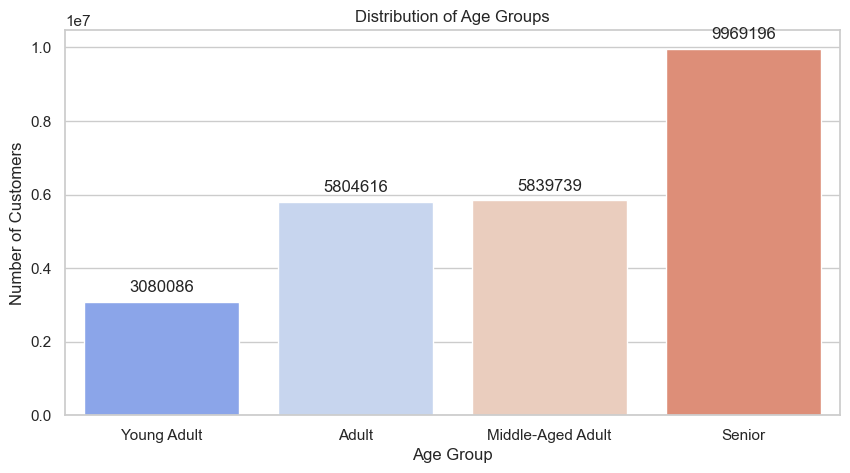

In [17]:
# Create the plot with the specified order
plt.figure(figsize=(10, 5)) 
# Age Group Distribution
bar_chart_age_group = sns.countplot(
    x='age_group',
    data=user_sample, 
    order=age_order,
    palette='coolwarm'
)

# Adding customizations
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

for bar in bar_chart_age_group.patches:
    height = bar.get_height()
    bar_chart_age_group.annotate(f'{int(height)}', 
                                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                                 xytext=(0, 5),  # 5 points vertical offset
                                 textcoords='offset points', 
                                 ha='center', va='bottom')

In [18]:
# Export this barchart as an image file
bar_chart_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_age_group.png'))

### Visualization 2: Distribution of Income Brackets

In [19]:
# Specifying the order of the columns
income_order = ['Low Income', 'Middle Income', 'Upper Middle Income', 'High Income']

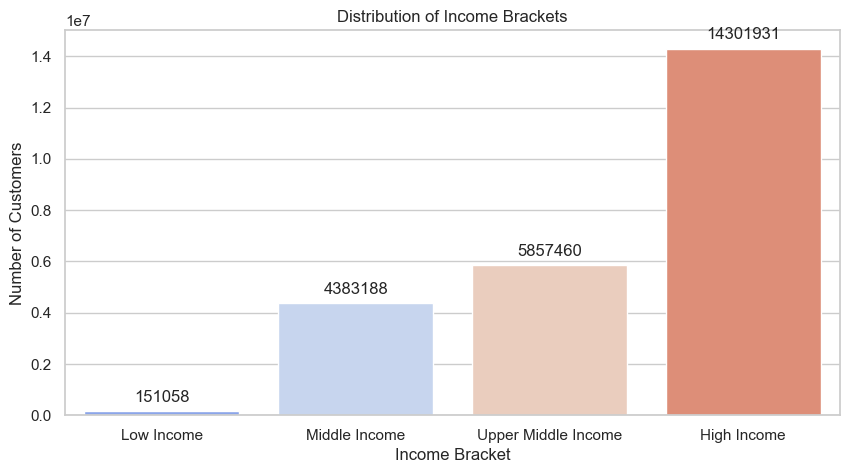

In [20]:
# Income Bracket Distribution
plt.figure(figsize=(10, 5))
bar_chart_income_bracket = sns.countplot(
    x='income_bracket',
    data=user_sample,
    order=income_order,
    palette='coolwarm'
)
plt.title('Distribution of Income Brackets')
plt.xlabel('Income Bracket')
plt.ylabel('Number of Customers')

# Add count labels to each bar
for p in bar_chart_income_bracket.patches:
    bar_chart_income_bracket.annotate(
        format(p.get_height(), '.0f'),  # Format the height as an integer
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the center of the bar
        ha = 'center', va = 'center',   # Center alignment
        xytext = (0, 10),               # Offset label above the bar
        textcoords = 'offset points'
    )

In [21]:
# Export this barchart as an image file
bar_chart_income_bracket.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_income_bracket.png'))

In [22]:
# Count the number of customers in each income bracket
income_counts = user_sample['income_bracket'].value_counts()

In [23]:
income_counts

income_bracket
High Income            14301931
Upper Middle Income     5857460
Middle Income           4383188
Low Income               151058
Name: count, dtype: int64

In [24]:
user_sample.shape[0]

24693637

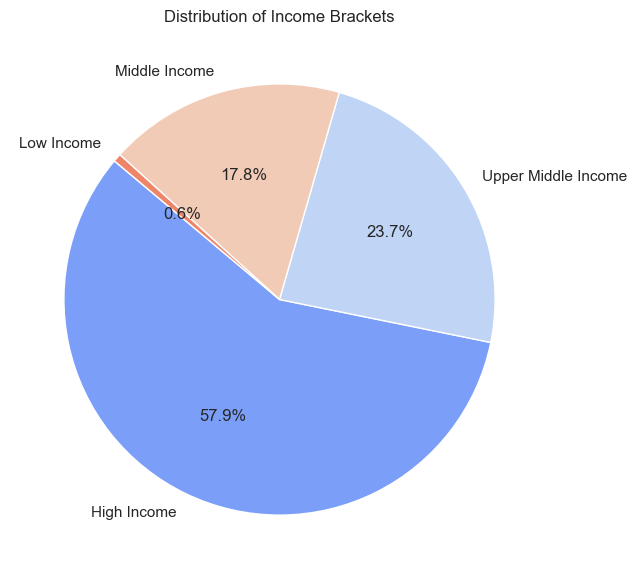

In [25]:
income_order = ['Low Income', 'Middle Income', 'Upper Middle Income', 'High Income']
# Income Bracket Distribution as a Pie Chart
plt.figure(figsize=(10, 7))
pie_chart_income_bracket = plt.pie(
    income_counts,
    labels=income_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm', len(income_counts)),
    startangle=140
)
plt.title('Distribution of Income Brackets')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_income_bracket_distribution.png'), bbox_inches = 'tight')
plt.show()

In [26]:
# Checking the dataframe
user_sample.head()

,user_id,age_group,income_bracket,gender,fam_status,dependents,region,loyalty_flag,spending_flag,days_since_prior_order,user_avg_price,department,product_name
0,1,Adult,Middle Income,Female,married,Three or More Dependents,South,New customer,Low spender,7.0,6.367797,beverages,Soda
1,1,Adult,Middle Income,Female,married,Three or More Dependents,South,New customer,Low spender,15.0,6.367797,beverages,Soda
2,1,Adult,Middle Income,Female,married,Three or More Dependents,South,New customer,Low spender,21.0,6.367797,beverages,Soda
3,1,Adult,Middle Income,Female,married,Three or More Dependents,South,New customer,Low spender,29.0,6.367797,beverages,Soda
4,1,Adult,Middle Income,Female,married,Three or More Dependents,South,New customer,Low spender,28.0,6.367797,beverages,Soda


### Visualization 3: Distribution of Dependents

In [27]:
# Define the order for dependents
dependents_order = ['Single/No Dependents', 'One/Two Dependent', 'Three or More Dependents']

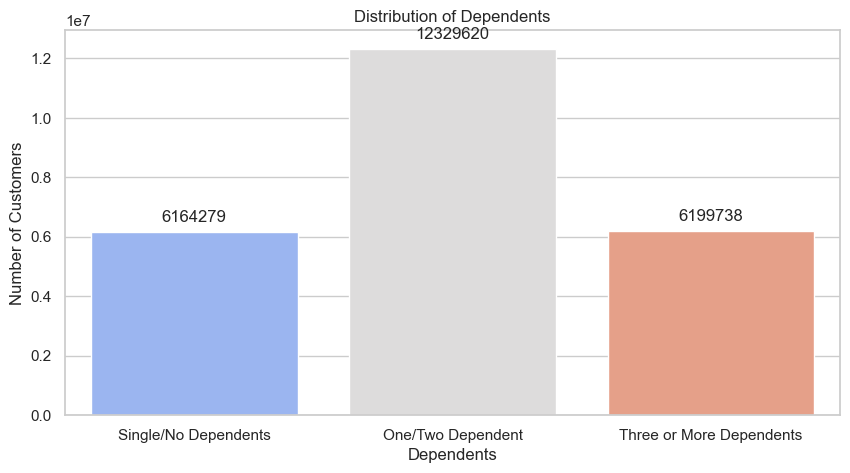

In [29]:
# Dependents Distribution
plt.figure(figsize=(10, 5))
bar_chart_dependents = sns.countplot(
    x='dependents',
    data=user_sample,
    order=dependents_order,
    palette='coolwarm'
)

# Adding customizations
plt.title('Distribution of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Number of Customers')

# Add numbers to the bar chart
for bar in bar_chart_dependents.patches:
    height = bar.get_height()
    bar_chart_dependents.annotate(f'{int(height)}', 
                                  xy=(bar.get_x() + bar.get_width() / 2, height), 
                                  xytext=(0, 5),  # 5 points vertical offset
                                  textcoords='offset points', 
                                  ha='center', va='bottom')

# Save the plot
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_distribution.png'))

# Show the plot
plt.show()

In [30]:
# Count the number of customers in each dependent bracket
dependents_counts = user_sample['dependents'].value_counts()

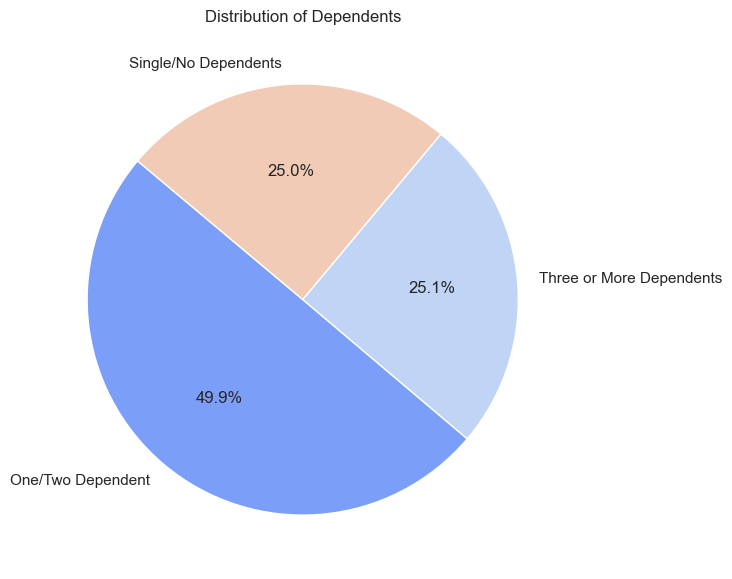

In [31]:
dependents_order = ['Single/No Dependents', 'One/Two Dependent', 'Three or More Dependents']
# Dependents Distribution as a Pie Chart
plt.figure(figsize=(10, 7))
pie_chart_dependents_distribution = plt.pie(
    dependents_counts,
    labels=dependents_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm', len(income_counts)),
    startangle=140
)
plt.title('Distribution of Dependents')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_dependents.png'), bbox_inches = 'tight')
plt.show()

In [32]:
dependents_counts

dependents
One/Two Dependent           12329620
Three or More Dependents     6199738
Single/No Dependents         6164279
Name: count, dtype: int64

In looking at these charts, it is interesting to see that the majority of customers have high income as well as one/two dependents.

## 06. Creating Specific Customer-Profiles

I have created customer profiles for age group and income, the family size will be analyzed seperately. The rationale for combining certian segments, like middle and upper middle income profiles is because these groups are similar in size and spending habits. Since the high income group is the largest, I merged the middle and upper middle groups as well. This way, we can give more targeted recommendations to marketing of customer profile groups that appeal to a large number of customers with similar preferences.
#### Low Income Profiles
These profiles have limited disposable income and a focus on essential and affordable products.
- **Low-income young adult**
- **Low-income adult**
- **Low-income senior**

#### Middle and Upper Middle Income Profiles
These profiles have moderate to upper middle disposable income and value high-quality products that offer good value.
- **Middle/upper middle-income young adult**
- **Middle/upper middle-income adult**
- **Middle/upper middle-income senior**

#### High Income Profiles
These profiles have significant disposable income and a focus on premium, lifestyle, and trendy products.
- **High-income young adult**
- **High-income adult**
- **High-income senior**

#### Uncategorized
- **Uncategorized**: Any combinations not fitting the above profiles.

In [33]:
# Creating profiling variables
def create_profile(row):
    # Low Income Profiles
    if row['income_bracket'] == 'Low Income':
        if row['age_group'] == 'Young Adult':
            return 'Low-income young adult'  # Low-income young adults with limited disposable income and a focus on essential and affordable products.
        elif row['age_group'] == 'Adult':
            return 'Low-income adult'  # Low-income adults with limited disposable income and a focus on essential and affordable products.
        elif row['age_group'] == 'Middle-Aged Adult':
            return 'Low-income middle-aged adult'  # Low-income middle-aged adults with limited disposable income and a focus on essential and affordable products.
        elif row['age_group'] == 'Senior':
            return 'Low-income senior'  # Low-income seniors with limited disposable income and a focus on essential and affordable products.
    
    # Middle Income Profiles
    elif row['income_bracket'] == 'Middle Income':
        if row['age_group'] == 'Young Adult':
            return 'Middle-income young adult'  # Middle-income young adults with moderate disposable income and a focus on affordable yet quality products.
        elif row['age_group'] == 'Adult':
            return 'Middle-income adult'  # Middle-income adults with moderate disposable income and a focus on affordable yet quality products.
        elif row['age_group'] == 'Middle-Aged Adult':
            return 'Middle-income middle-aged adult'  # Middle-income middle-aged adults with moderate disposable income and a focus on affordable yet quality products.
        elif row['age_group'] == 'Senior':
            return 'Middle-income senior'  # Middle-income seniors with moderate disposable income and a focus on affordable yet quality products.
    
    # Upper Middle and High Income Profiles
    elif row['income_bracket'] in ['Upper Middle Income', 'High Income']:
        if row['age_group'] == 'Young Adult':
            return 'Upper middle/high-income young adult'  # Upper middle-income and high-income young adults who are aspirational and value high-quality products that offer good value.
        elif row['age_group'] == 'Adult':
            return 'Upper middle/high-income adult'  # Upper middle-income and high-income adults who are aspirational and value high-quality products that offer good value.
        elif row['age_group'] == 'Middle-Aged Adult':
            return 'Upper middle/high-income middle-aged adult'  # Upper middle-income and high-income middle-aged adults who are aspirational and value high-quality products that offer good value.
        elif row['age_group'] == 'Senior':
            return 'Upper middle/high-income senior'  # Upper middle-income and high-income seniors who are aspirational and value high-quality products that offer good value.
    
    # Uncategorized
    return 'Uncategorized'

# Apply the function
user_sample['customer_profile'] = user_sample.apply(create_profile, axis=1)

In [34]:
# Get frequency for each customer_profile
user_sample['customer_profile'].value_counts()

customer_profile
Upper middle/high-income senior               8909147
Upper middle/high-income middle-aged adult    5196680
Upper middle/high-income adult                3948857
Upper middle/high-income young adult          2104707
Middle-income adult                           1763562
Middle-income senior                          1050269
Middle-income young adult                      931224
Middle-income middle-aged adult                638133
Low-income adult                                92197
Low-income young adult                          44155
Low-income senior                                9780
Low-income middle-aged adult                     4926
Name: count, dtype: int64

In [35]:
user_sample.shape[0]

24693637

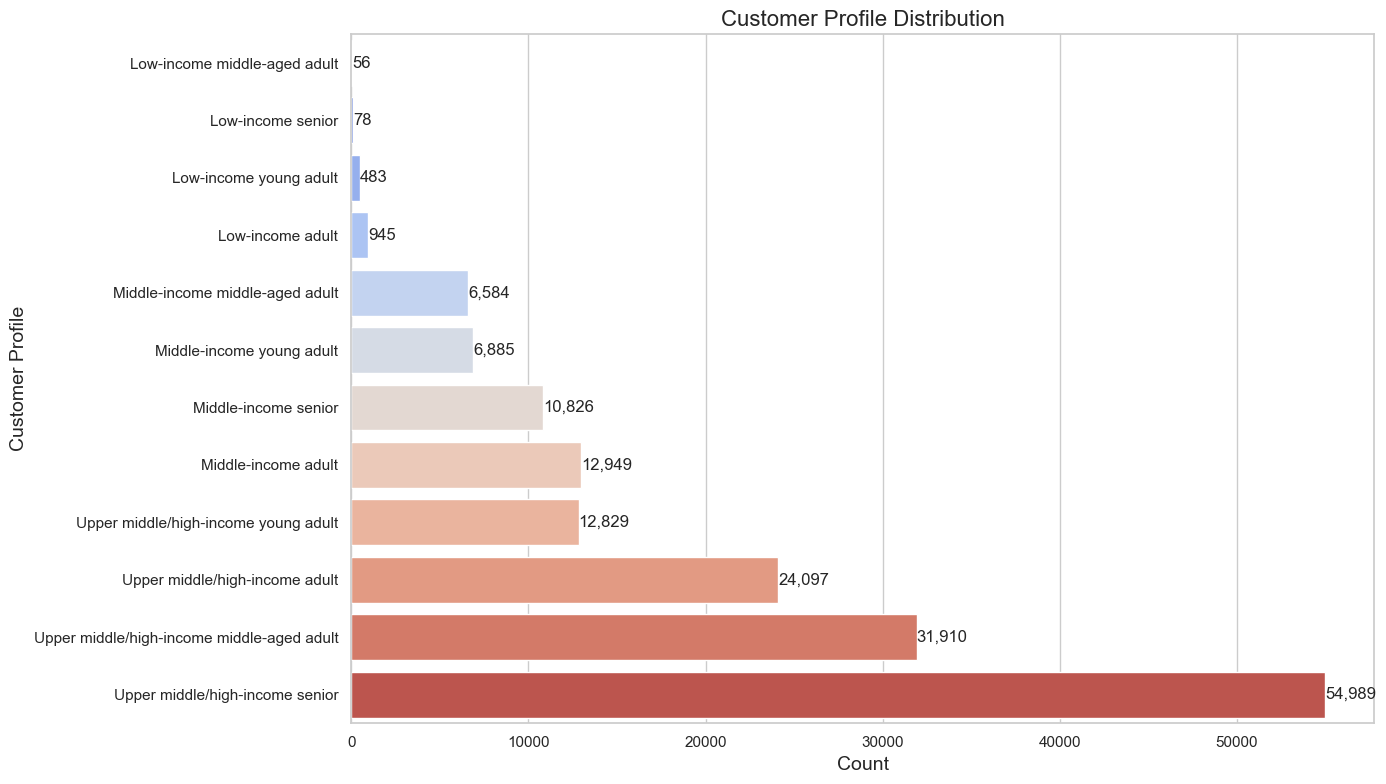

In [49]:
# Making a bar chart of this information
# Get the value counts for customer profiles
profile_counts = user_sample['customer_profile'].value_counts()

# Define the order of profiles
profile_order = [
    'Low-income middle-aged adult',
    'Low-income senior',
    'Low-income young adult',
    'Low-income adult',
    'Middle-income middle-aged adult',
    'Middle-income young adult',
    'Middle-income senior',
    'Middle-income adult',
    'Upper middle/high-income young adult',
    'Upper middle/high-income adult',
    'Upper middle/high-income middle-aged adult',
    'Upper middle/high-income senior'
]

# Reorder the profile counts based on the specified order
profile_counts = profile_counts.reindex(profile_order)

# Set the Seaborn style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", len(profile_order))

# Create a horizontal bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=profile_counts.values, y=profile_counts.index, palette=palette)
plt.title('Customer Profile Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Customer Profile', fontsize=14)

# Add count labels to each bar
for index, value in enumerate(profile_counts.values):
    plt.text(value, index, f'{value:,}', va='center', ha='left', fontsize=12)

plt.tight_layout()
# Save the plot
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_profile_distribution.png'))

# Show the plot
plt.show()

***I've been having issues with my kernel dying so I am exporting this data at this checkpoint***

In [36]:
user_sample.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'user_sample_cust_profiles.pkl'))

## 07. Aggregating Max, Mean, and Min Variables on a Customer-Profile

Creating aggregates on days_since_prior_order and user_avg_price for usage frequency and expenditure.

In [37]:
# Aggregating max, mean, and min for days_since_prior_order and user_avg_price
agg_data = user_sample.groupby('user_id').agg({
    'days_since_prior_order': ['max', 'mean', 'min'],
    'user_avg_price': ['max', 'mean', 'min']
}).reset_index()

In [38]:
agg_data

user_id days_since_prior_order                 user_avg_price  \
                                  max       mean  min            max   
0            1                   30.0  19.135593  0.0       6.367797   
1            2                   30.0  15.701087  3.0       7.515897   
2            3                   21.0  12.223881  7.0       8.197727   
3            4                   21.0  13.500000  0.0       8.205556   
4            7                   30.0  12.143646  2.0       7.466990   
...        ...                    ...        ...  ...            ...   
162626  206203                   30.0  24.405660  7.0       7.138655   
162627  206206                   15.0   4.369565  0.0       7.646667   
162628  206207                   30.0  13.504762  1.0       7.313453   
162629  206208                   20.0   7.636015  0.0       8.366617   
162630  206209                   30.0  18.839286  3.0       7.058915   

                            
            mean       min  
0       6.367797  6.367797  
1       7.515897  7.515897  
2       8.197727  8.197727  
3       8.205556  8.205556  
4       7.466990  7.466990  
...          ...       ...  
162626  7.138655  7.138655  
162627  7.646667  7.646667  
162628  7.313453  7.313453  
162629  8.366617  8.366617  
162630  7.058915  7.058915  

[162631 rows x 7 columns]

In [39]:
# Flatten column names
agg_data.columns = ['_'.join(col).strip('_') for col in agg_data.columns.values]

In [40]:
# Merging aggregated data back to the user_sample dataframe
user_sample = pd.merge(user_sample.drop_duplicates(subset=['user_id']), agg_data, left_on='user_id', right_on='user_id')

In [41]:
# Dropping the extra user_id_ column
user_sample = user_sample.drop(columns=['days_since_prior_order', 'user_avg_price'])

In [42]:
# Check the dataframe
user_sample.head()

,user_id,age_group,income_bracket,gender,fam_status,dependents,region,loyalty_flag,spending_flag,department,product_name,customer_profile,days_since_prior_order_max,days_since_prior_order_mean,days_since_prior_order_min,user_avg_price_max,user_avg_price_mean,user_avg_price_min
0,1,Adult,Middle Income,Female,married,Three or More Dependents,South,New customer,Low spender,beverages,Soda,Middle-income adult,30.0,19.135593,0.0,6.367797,6.367797,6.367797
1,15,Senior,Middle Income,Female,divorced/widowed,Single/No Dependents,Midwest,Regular customer,Low spender,beverages,Soda,Middle-income senior,21.0,11.211538,3.0,3.980556,3.980556,3.980556
2,19,Senior,High Income,Female,married,One/Two Dependent,South,New customer,Low spender,beverages,Soda,Upper middle/high-income senior,20.0,7.928205,5.0,8.372059,8.372059,8.372059
3,21,Senior,High Income,Male,divorced/widowed,Single/No Dependents,West,Regular customer,Low spender,beverages,Soda,Upper middle/high-income senior,30.0,10.202312,1.0,7.012683,7.012683,7.012683
4,31,Adult,Middle Income,Female,married,One/Two Dependent,South,Regular customer,Low spender,beverages,Soda,Middle-income adult,10.0,6.067857,0.0,8.137793,8.137793,8.137793


In [43]:
user_sample.shape[0]

162631

## Creating a Data Checkpoint and Exporting Dataframe 
Exporting as both a CSV and Pickle in case of issues with the Kernal, this will also be a necessary part of the data included with this report

In [44]:
user_sample.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_user_sample_report.pkl'))

In [45]:
user_sample.to_csv(os.path.join(path, '02 Data','Prepared Data', 'final_user_sample_report.csv'))

## 07. Combined Crosstab of Customer Profiles, Regions, Mean Days Since Prior Order, & Mean User Avg Price

A crosstab (cross-tabulation) in Python is a tool used for summarizing and analyzing the relationship between two or more categorical variables. It is similar to a contingency table and is often used in statistics to understand the frequency distribution of variables.

### I am using cross-tabulation to create a comprehensive comparison of different customer profiles across regions, focusing on the mean days since prior order and mean user average price.

In [3]:
# Re-Import this dataset
user_sample = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_user_sample_report.pkl'))

In [4]:
# Create a crosstab for mean days since prior order
crosstab_days_since_prior_order = pd.crosstab(
    index=user_sample['customer_profile'],
    columns=user_sample['region'],
    values=user_sample['days_since_prior_order_mean'],
    aggfunc='mean'
)

In [5]:
# Exporting crosstabs to Excel for easier viewing and validation
crosstab_days_since_prior_order.to_clipboard()

In looking at this table, it is not very large so I can print it below.

In [6]:
crosstab_days_since_prior_order

region,Midwest,Northeast,South,West
customer_profile,,,,
Low-income adult,14.096799,13.916593,14.368242,14.295482
Low-income middle-aged adult,13.000843,15.069441,12.588722,13.369765
Low-income senior,14.338458,13.418534,14.741942,14.058157
Low-income young adult,14.510133,14.755846,14.522292,14.528379
Middle-income adult,13.723781,13.592039,13.568957,13.551490
Middle-income middle-aged adult,14.081321,14.086112,13.855492,13.874040
Middle-income senior,13.925532,13.873876,13.967136,13.852568
Middle-income young adult,13.675420,13.492710,13.585660,13.510853
Upper middle/high-income adult,13.263330,13.318514,13.236108,13.107224


In [7]:
# Create a crosstab for mean user average price
crosstab_user_avg_price = pd.crosstab(
    index=user_sample['customer_profile'],
    columns=user_sample['region'],
    values=user_sample['user_avg_price_mean'],
    aggfunc='mean'
)

In [8]:
# Exporting crosstabs to Excel for easier viewing and validation
crosstab_user_avg_price.to_clipboard()

In looking at this table, it is not very large so I can print it below.

In [9]:
crosstab_user_avg_price

region,Midwest,Northeast,South,West
customer_profile,,,,
Low-income adult,6.241680,6.412272,6.279528,6.293103
Low-income middle-aged adult,6.165182,5.896542,6.659988,6.398250
Low-income senior,6.485877,6.272104,6.521788,6.253188
Low-income young adult,6.268108,6.406792,6.378355,6.290986
Middle-income adult,7.305669,7.289732,7.306250,7.316251
Middle-income middle-aged adult,6.279231,6.268444,6.287829,6.277600
Middle-income senior,6.311084,6.276013,6.272385,6.272883
Middle-income young adult,7.353430,7.265977,7.275344,7.298961
Upper middle/high-income adult,15.298517,16.638093,16.541091,12.481349


### Notable Observations:
- **High-income single adult:** Shows significant variation across regions, with the highest average user price in the Midwest (21.17) and the lowest in the West (11.42).
- **Older adult with no dependents**: Also displays notable variation, with the highest average user price in the Northeast (15.27) and the lowest in the Midwest (10.48).
- **Young parent with multiple dependents:** Has relatively high average user prices across all regions, peaking in the West (17.51) and being the lowest in the Midwest (14.97).
- **Middle-income parent:** Displays fairly consistent average user prices across all regions, with a slight increase in the West (13.33).
- **Middle-income young adult**: Maintains similar average user prices across regions, with minor variations.
- **Uncategorized:** Exhibits significant variation, with the highest average user price in the South (14.64) and the lowest in the Northeast (12.63).
- **Low-income parent and Low-income single adult:** Both categories show similar average user prices across all regions, with minimal variations.

In [10]:
# Combine the two crosstabs into a single DataFrame
combined_crosstab = pd.concat(
    [crosstab_days_since_prior_order, crosstab_user_avg_price],
    keys=['Mean Days Since Prior Order', 'Mean User Average Price'],
    axis=1
)

In [11]:
# Exporting crosstabs to Excel for easier viewing and validation
combined_crosstab.to_clipboard()

In looking at this table, it is not very large so I can print it below.

In [12]:
combined_crosstab

Mean Days Since Prior Order  \
region                                                         Midwest   
customer_profile                                                         
Low-income adult                                             14.096799   
Low-income middle-aged adult                                 13.000843   
Low-income senior                                            14.338458   
Low-income young adult                                       14.510133   
Middle-income adult                                          13.723781   
Middle-income middle-aged adult                              14.081321   
Middle-income senior                                         13.925532   
Middle-income young adult                                    13.675420   
Upper middle/high-income adult                               13.263330   
Upper middle/high-income middle-aged adult                   13.184732   
Upper middle/high-income senior                              13.314835   
Upper middle/high-income young adult                         13.247301   

                                                                             \
region                                      Northeast      South       West   
customer_profile                                                              
Low-income adult                            13.916593  14.368242  14.295482   
Low-income middle-aged adult                15.069441  12.588722  13.369765   
Low-income senior                           13.418534  14.741942  14.058157   
Low-income young adult                      14.755846  14.522292  14.528379   
Middle-income adult                         13.592039  13.568957  13.551490   
Middle-income middle-aged adult             14.086112  13.855492  13.874040   
Middle-income senior                        13.873876  13.967136  13.852568   
Middle-income young adult                   13.492710  13.585660  13.510853   
Upper middle/high-income adult              13.318514  13.236108  13.107224   
Upper middle/high-income middle-aged adult  13.323191  13.233033  13.283679   
Upper middle/high-income senior             13.125789  13.289865  13.239742   
Upper middle/high-income young adult        13.017372  13.262995  13.203069   

                                           Mean User Average Price             \
region                                                     Midwest  Northeast   
customer_profile                                                                
Low-income adult                                          6.241680   6.412272   
Low-income middle-aged adult                              6.165182   5.896542   
Low-income senior                                         6.485877   6.272104   
Low-income young adult                                    6.268108   6.406792   
Middle-income adult                                       7.305669   7.289732   
Middle-income middle-aged adult                           6.279231   6.268444   
Middle-income senior                                      6.311084   6.276013   
Middle-income young adult                                 7.353430   7.265977   
Upper middle/high-income adult                           15.298517  16.638093   
Upper middle/high-income middle-aged adult               14.546040  11.367027   
Upper middle/high-income senior                          11.940355  14.428396   
Upper middle/high-income young adult                     20.017057  12.326703   

                                                                  
region                                          South       West  
customer_profile                                                  
Low-income adult                             6.279528   6.293103  
Low-income middle-aged adult                 6.659988   6.398250  
Low-income senior                            6.521788   6.253188  
Low-income young adult                       6.378355   6.290986  
Middle-income adult                          7.306250   7.316

## 08. Comparing Customer Profiles with Regional Distribution

### Visualization 1 & 2: Profiles & Number of Dependents Distribution in Each Region
I first wanted to compare each of the distribution of each profile per region.

In [13]:
# Count the number of each customer profile within each region
region_profile_distribution = user_sample.groupby(['region', 'customer_profile']).size().unstack().fillna(0)

In [14]:
# Reindex the columns in the desired order
profile_order = [
    'Low-income adult',
    'Low-income middle-aged adult',
    'Low-income senior',
    'Low-income young adult',
    'Middle-income adult',
    'Middle-income middle-aged adult',
    'Middle-income senior',
    'Middle-income young adult',
    'Upper middle/high-income adult',
    'Upper middle/high-income middle-aged adult',
    'Upper middle/high-income senior',
    'Upper middle/high-income young adult'
]

In [15]:
region_profile_distribution = region_profile_distribution[profile_order]

In [16]:
# Reorder the index to match the specified regions
region_profile_distribution = region_profile_distribution.reindex(['Northeast', 'Midwest', 'South', 'West'], fill_value=0)

In [17]:
region_profile_distribution

customer_profile,Low-income adult,Low-income middle-aged adult,Low-income senior,Low-income young adult,Middle-income adult,Middle-income middle-aged adult,Middle-income senior,Middle-income young adult,Upper middle/high-income adult,Upper middle/high-income middle-aged adult,Upper middle/high-income senior,Upper middle/high-income young adult
region,,,,,,,,,,,,
Northeast,166,8,19,92,2272,1162,1889,1182,4288,5596,9707,2200
Midwest,242,13,20,116,2963,1574,2542,1570,5661,7711,12941,3023
South,309,19,24,149,4341,2227,3587,2320,8090,10386,18360,4381
West,228,16,15,126,3373,1621,2808,1813,6058,8217,13981,3225


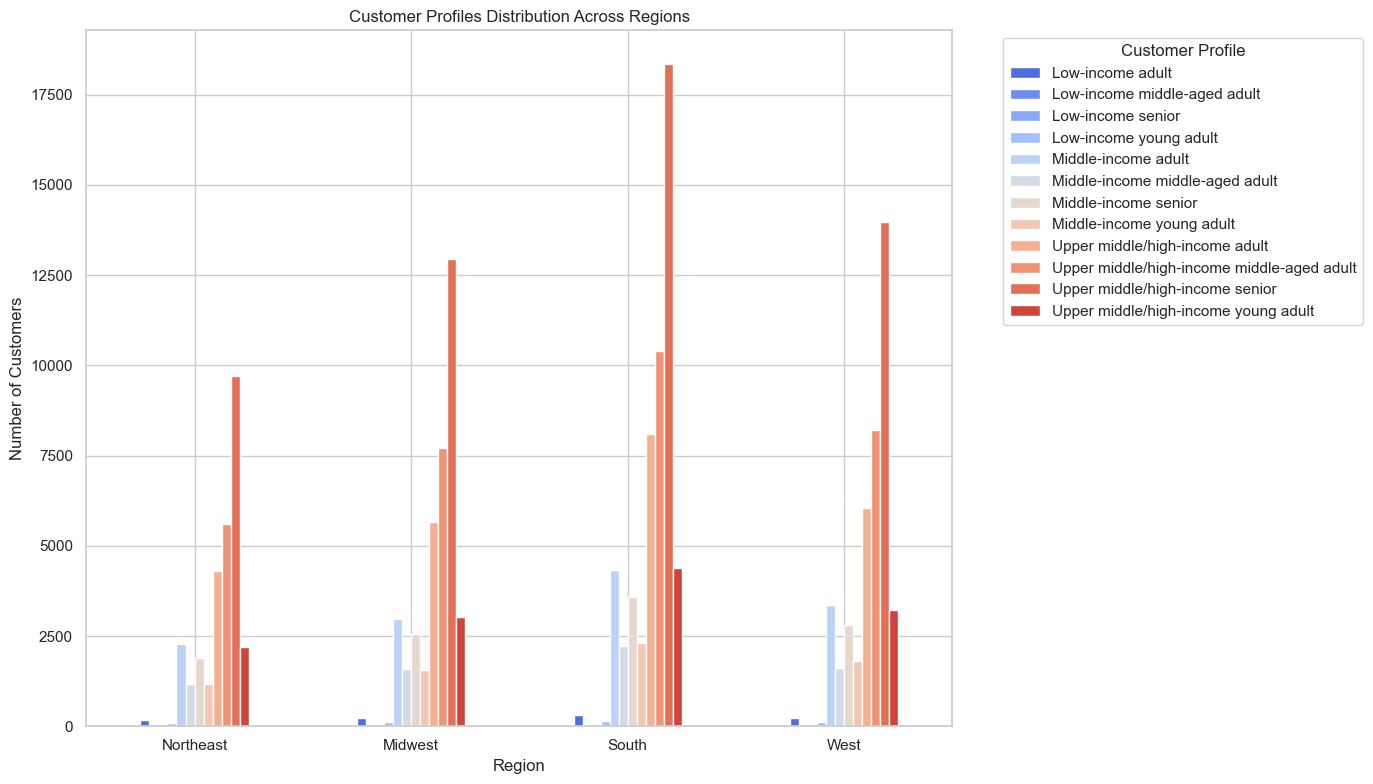

In [18]:
# Set the style and palette for Seaborn
sns.set(style="whitegrid")
palette = sns.color_palette('coolwarm', n_colors=len(profile_order))

# Plotting the multi-bar chart
fig, ax = plt.subplots(figsize=(14, 8))
region_profile_distribution.plot(kind='bar', ax=ax, color=palette)
ax.set_title('Customer Profiles Distribution Across Regions')
ax.set_xlabel('Region')
ax.set_ylabel('Number of Customers')
ax.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profiles_distribution.png'))
plt.show()

The analysis reveals that the Southern region consistently has the highest number of individuals across most customer profiles, indicating a larger customer base or greater popularity of Instacart in this region.\
\
The largest profile in each region is the Upper middle/high-income senior, with the highest concentration in the South. This profile includes seniors with any number of dependents within the upper middle or high-income bracket.

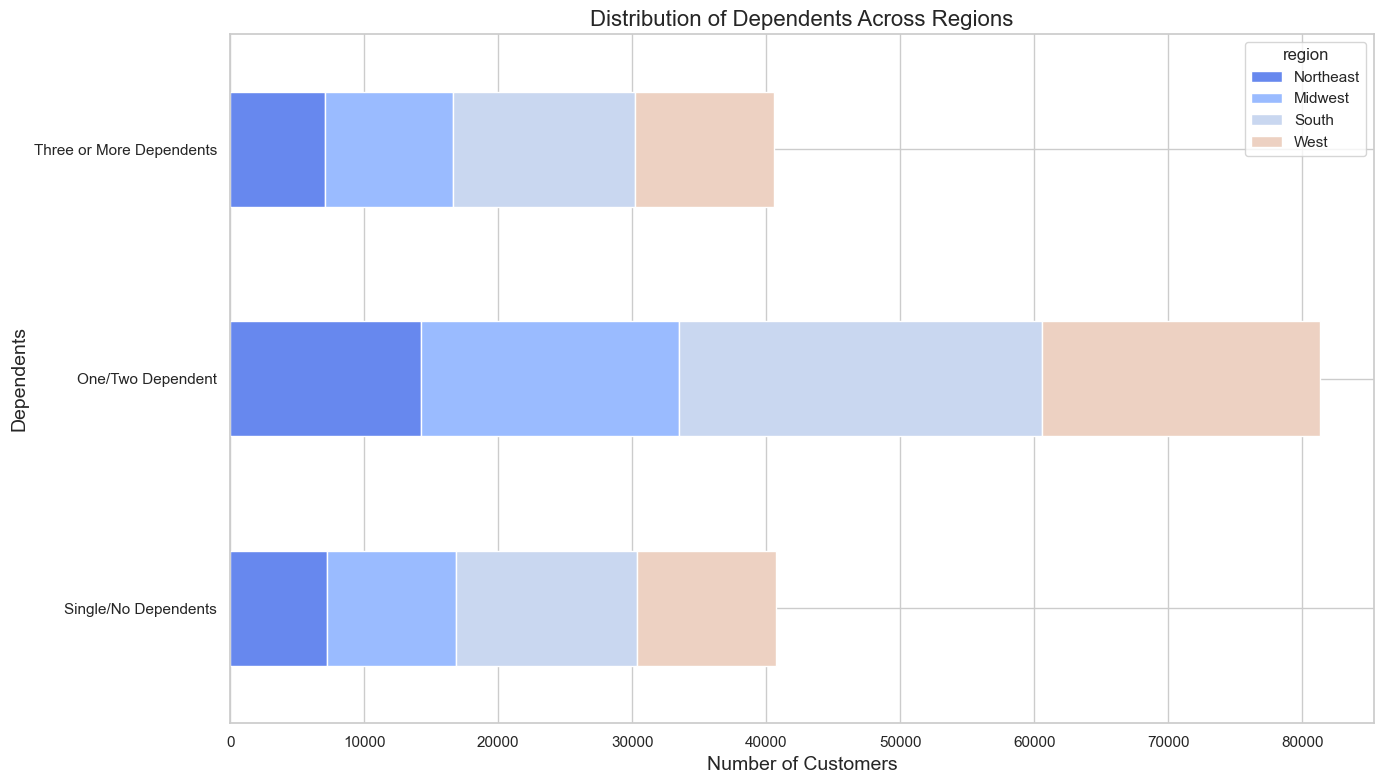

In [19]:
# Count the number of dependents within each region
region_dependents_distribution = user_sample.groupby(['region', 'dependents']).size().unstack().fillna(0)

# Reindex the columns in the desired order
dependents_order = [
    'Single/No Dependents',
    'One/Two Dependent',
    'Three or More Dependents'
]

# Reorder the columns and index to match the specified regions
region_dependents_distribution = region_dependents_distribution[dependents_order]
region_dependents_distribution = region_dependents_distribution.reindex(['Northeast', 'Midwest', 'South', 'West'], fill_value=0)

# Set the Seaborn style and palette
sns.set(style="whitegrid", palette="coolwarm")

# Create a horizontal bar chart
region_dependents_distribution.T.plot(kind='barh', figsize=(14, 8), stacked=True, color=sns.color_palette("coolwarm"))

plt.title('Distribution of Dependents Across Regions', fontsize=16)
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('Dependents', fontsize=14)

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependent_distribution_across_region.png'))
plt.show()

In [65]:
region_dependents_distribution

dependents,Single/No Dependents,One/Two Dependent,Three or More Dependents
region,,,
Northeast,7255,14258,7068
Midwest,9566,19232,9578
South,13537,27058,13598
West,10369,20744,10368


### Visualization 3: Average Spending by Profile Across Regions

In [21]:
# Calculate the average values
mean_values = user_sample.groupby(['customer_profile', 'region']).agg({
    'user_avg_price_mean': 'mean',
    'days_since_prior_order_mean': 'mean'
}).reset_index()

In [22]:
# Pivot the data for plotting
avg_price_pivot = mean_values.pivot(index='customer_profile', columns='region', values='user_avg_price_mean')
days_since_prior_order_pivot = mean_values.pivot(index='customer_profile', columns='region', values='days_since_prior_order_mean')

In [23]:
avg_price_pivot

region,Midwest,Northeast,South,West
customer_profile,,,,
Low-income adult,6.241680,6.412272,6.279528,6.293103
Low-income middle-aged adult,6.165182,5.896542,6.659988,6.398250
Low-income senior,6.485877,6.272104,6.521788,6.253188
Low-income young adult,6.268108,6.406792,6.378355,6.290986
Middle-income adult,7.305669,7.289732,7.306250,7.316251
Middle-income middle-aged adult,6.279231,6.268444,6.287829,6.277600
Middle-income senior,6.311084,6.276013,6.272385,6.272883
Middle-income young adult,7.353430,7.265977,7.275344,7.298961
Upper middle/high-income adult,15.298517,16.638093,16.541091,12.481349


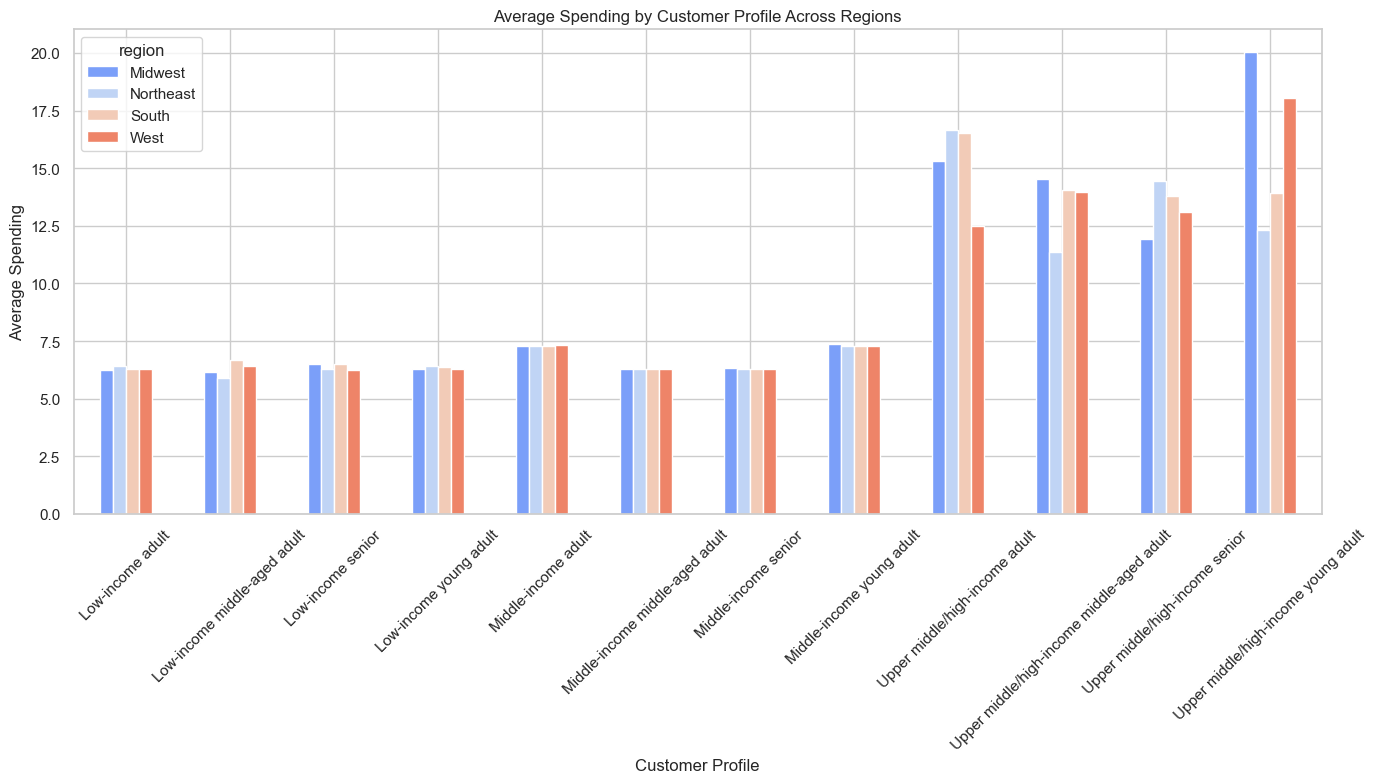

In [24]:
# Set the style and palette for Seaborn
sns.set(style="whitegrid")
palette = sns.color_palette('coolwarm', n_colors=len(avg_price_pivot.columns))

# Bar Chart for Average Spending by Customer Profile Across Regions
fig, ax = plt.subplots(figsize=(14, 8))
avg_price_pivot.plot(kind='bar', ax=ax, color=palette)
ax.set_xlabel('Customer Profile')
ax.set_ylabel('Average Spending')
ax.set_title('Average Spending by Customer Profile Across Regions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'average_spending_by_profile.png'))
plt.show()

In [25]:
days_since_prior_order_pivot

region,Midwest,Northeast,South,West
customer_profile,,,,
Low-income adult,14.096799,13.916593,14.368242,14.295482
Low-income middle-aged adult,13.000843,15.069441,12.588722,13.369765
Low-income senior,14.338458,13.418534,14.741942,14.058157
Low-income young adult,14.510133,14.755846,14.522292,14.528379
Middle-income adult,13.723781,13.592039,13.568957,13.551490
Middle-income middle-aged adult,14.081321,14.086112,13.855492,13.874040
Middle-income senior,13.925532,13.873876,13.967136,13.852568
Middle-income young adult,13.675420,13.492710,13.585660,13.510853
Upper middle/high-income adult,13.263330,13.318514,13.236108,13.107224


### Visualization 4 & 5: Average Days Since Prior Order by Profile & Dependents Across Regions

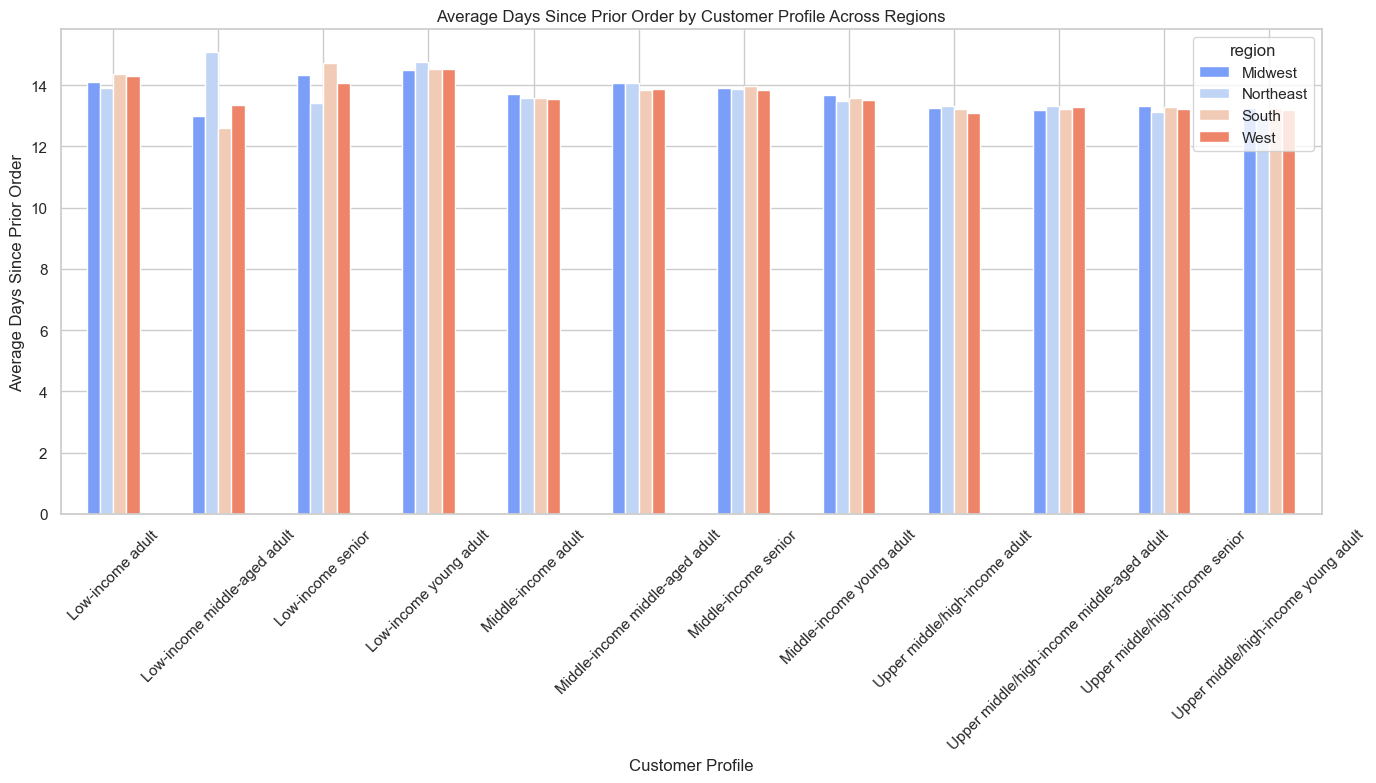

In [26]:
# Bar Chart for Average Days Since Prior Order by Customer Profile Across Regions
fig, ax = plt.subplots(figsize=(14, 8))
days_since_prior_order_pivot.plot(kind='bar', ax=ax, color=palette)
ax.set_xlabel('Customer Profile')
ax.set_ylabel('Average Days Since Prior Order')
ax.set_title('Average Days Since Prior Order by Customer Profile Across Regions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'average_days_since_prior_order_by_profile.png'))
plt.show()

In [27]:
days_since_prior_order_pivot

region,Midwest,Northeast,South,West
customer_profile,,,,
Low-income adult,14.096799,13.916593,14.368242,14.295482
Low-income middle-aged adult,13.000843,15.069441,12.588722,13.369765
Low-income senior,14.338458,13.418534,14.741942,14.058157
Low-income young adult,14.510133,14.755846,14.522292,14.528379
Middle-income adult,13.723781,13.592039,13.568957,13.551490
Middle-income middle-aged adult,14.081321,14.086112,13.855492,13.874040
Middle-income senior,13.925532,13.873876,13.967136,13.852568
Middle-income young adult,13.675420,13.492710,13.585660,13.510853
Upper middle/high-income adult,13.263330,13.318514,13.236108,13.107224


In [28]:
# Define the order of dependents if necessary
dependents_order = ['Single/No Dependents', 'One/Two Dependent', 'Three or More Dependents']

# Ensure the 'dependents' column has the correct order
user_sample['dependents'] = pd.Categorical(user_sample['dependents'], categories=dependents_order, ordered=True)

# Calculate the average days since prior order by dependents across regions
mean_values = user_sample.groupby(['dependents', 'region']).agg({
    'days_since_prior_order_mean': 'mean'
}).reset_index()

# Pivot the data for plotting
days_since_prior_order_pivot = mean_values.pivot(index='dependents', columns='region', values='days_since_prior_order_mean')

/var/folders/79/dbxtn02s0kzdngngl4z03wch0000gp/T/ipykernel_7422/1448682495.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = user_sample.groupby(['dependents', 'region']).agg({


In [29]:
days_since_prior_order_pivot

region,Midwest,Northeast,South,West
dependents,,,,
Single/No Dependents,13.375749,13.338842,13.417465,13.353417
One/Two Dependent,13.374731,13.364740,13.372741,13.357378
Three or More Dependents,13.486830,13.276368,13.364329,13.290912


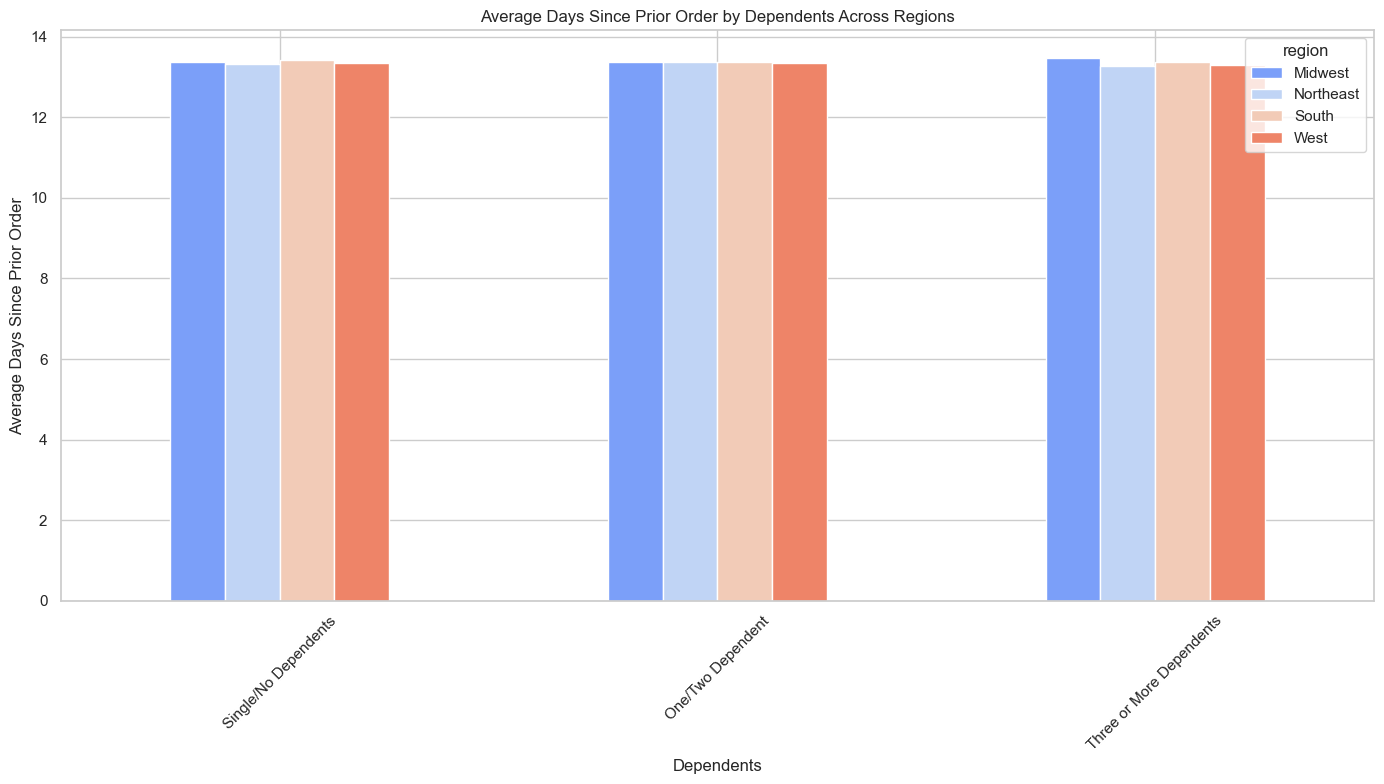

In [30]:
# Set the style and palette for Seaborn
sns.set(style="whitegrid")
palette = sns.color_palette('coolwarm', n_colors=len(days_since_prior_order_pivot.columns))

# Bar Chart for Average Days Since Prior Order by Dependents Across Regions
fig, ax = plt.subplots(figsize=(14, 8))
days_since_prior_order_pivot.plot(kind='bar', ax=ax, color=palette)
ax.set_xlabel('Dependents')
ax.set_ylabel('Average Days Since Prior Order')
ax.set_title('Average Days Since Prior Order by Dependents Across Regions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'average_days_since_prior_order_by_dependents.png'))
plt.show()

### Visualization 6 & 7: Top Five Departments By Region & Customer Profile

In [31]:
# Calculate the total order count for each department per region
total_orders_per_region = user_sample.groupby(['region', 'department']).size().reset_index(name='order_count')

In [32]:
# Get the top 5 departments for each region
top_departments_per_region = total_orders_per_region.groupby('region').apply(lambda x: x.nlargest(5, 'order_count')).reset_index(drop=True)

In [33]:
# Pivot the data for plotting
top_departments_per_region_pivot = top_departments_per_region.pivot(index='department', columns='region', values='order_count')

In [34]:
top_departments_per_region_pivot

region,Midwest,Northeast,South,West
department,,,,
beverages,2244,1681,3286,2499
dairy eggs,4340,3281,6038,4627
deli,1778,1221,2410,1842
produce,26066,19374,36858,28206
snacks,1511,1191,2094,1682


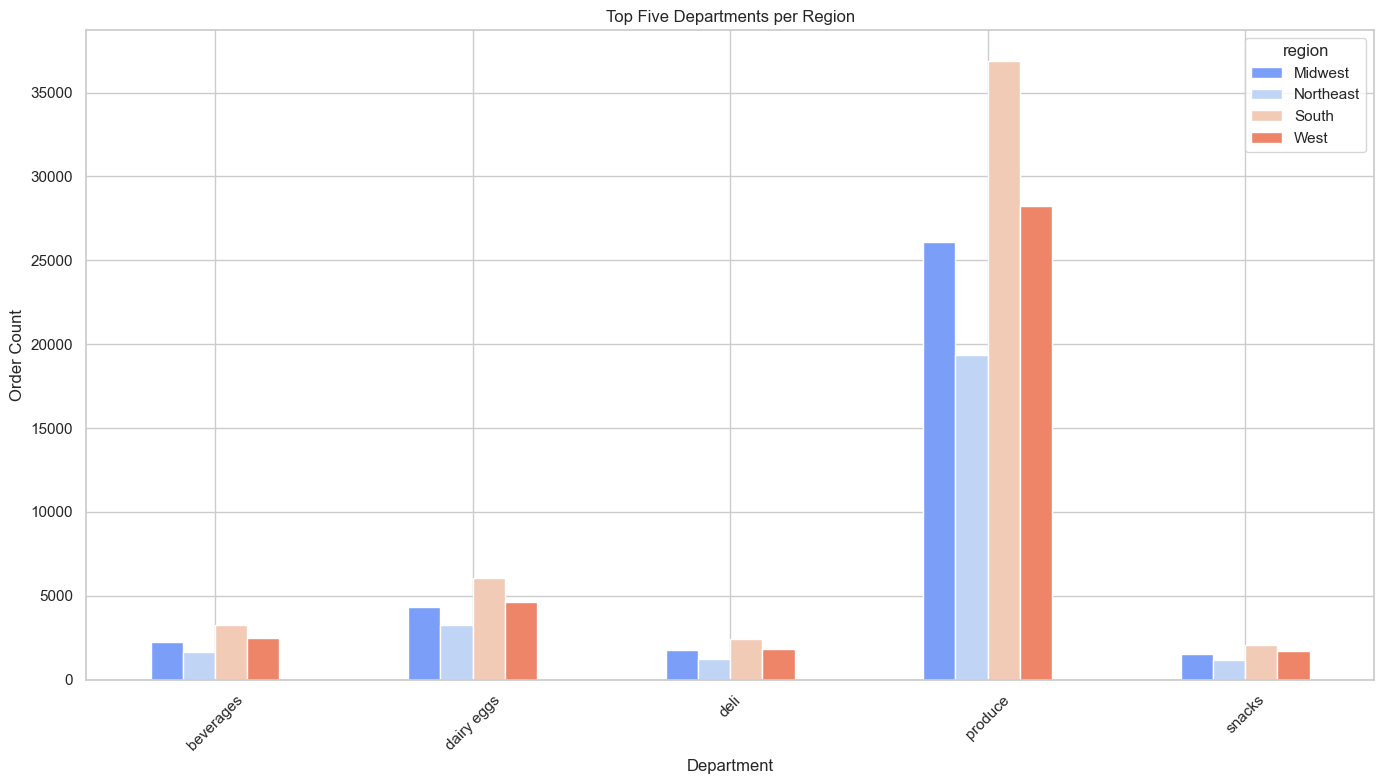

In [35]:
# Set the style and palette for Seaborn
sns.set(style="whitegrid")
palette = sns.color_palette('coolwarm', n_colors=len(top_departments_per_region_pivot.columns))

# Bar Chart for Top Five Departments per Region
fig, ax = plt.subplots(figsize=(14, 8))
top_departments_per_region_pivot.plot(kind='bar', ax=ax, color=palette)
ax.set_xlabel('Department')
ax.set_ylabel('Order Count')
ax.set_title('Top Five Departments per Region')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_five_departments_per_region.png'))
plt.show()

In [36]:
# Calculate the total order count for each department per customer profile
total_orders_per_profile = user_sample.groupby(['customer_profile', 'department']).size().reset_index(name='order_count')

In [37]:
# Get the top 5 departments for each customer profile
top_departments_per_profile = total_orders_per_profile.groupby('customer_profile').apply(lambda x: x.nlargest(5, 'order_count')).reset_index(drop=True)

In [38]:
# Pivot the data for plotting
top_departments_per_profile_pivot = top_departments_per_profile.pivot(index='department', columns='customer_profile', values='order_count')

In [39]:
top_departments_per_profile_pivot

customer_profile,Low-income adult,Low-income middle-aged adult,Low-income senior,Low-income young adult,Middle-income adult,Middle-income middle-aged adult,Middle-income senior,Middle-income young adult,Upper middle/high-income adult,Upper middle/high-income middle-aged adult,Upper middle/high-income senior,Upper middle/high-income young adult
department,,,,,,,,,,,,
beverages,123.0,3.0,6.0,44.0,995.0,787.0,1322.0,527.0,1124.0,1534.0,2657.0,588.0
dairy eggs,116.0,8.0,11.0,61.0,1531.0,783.0,1247.0,780.0,2655.0,3566.0,6121.0,1407.0
deli,40.0,2.0,2.0,NaN,501.0,261.0,432.0,326.0,1047.0,1484.0,2503.0,633.0
pantry,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,969.0,NaN,NaN
produce,513.0,31.0,48.0,274.0,8369.0,3628.0,5928.0,4423.0,17052.0,22492.0,38637.0,9109.0
snacks,72.0,7.0,7.0,36.0,616.0,527.0,933.0,349.0,810.0,NaN,1752.0,406.0


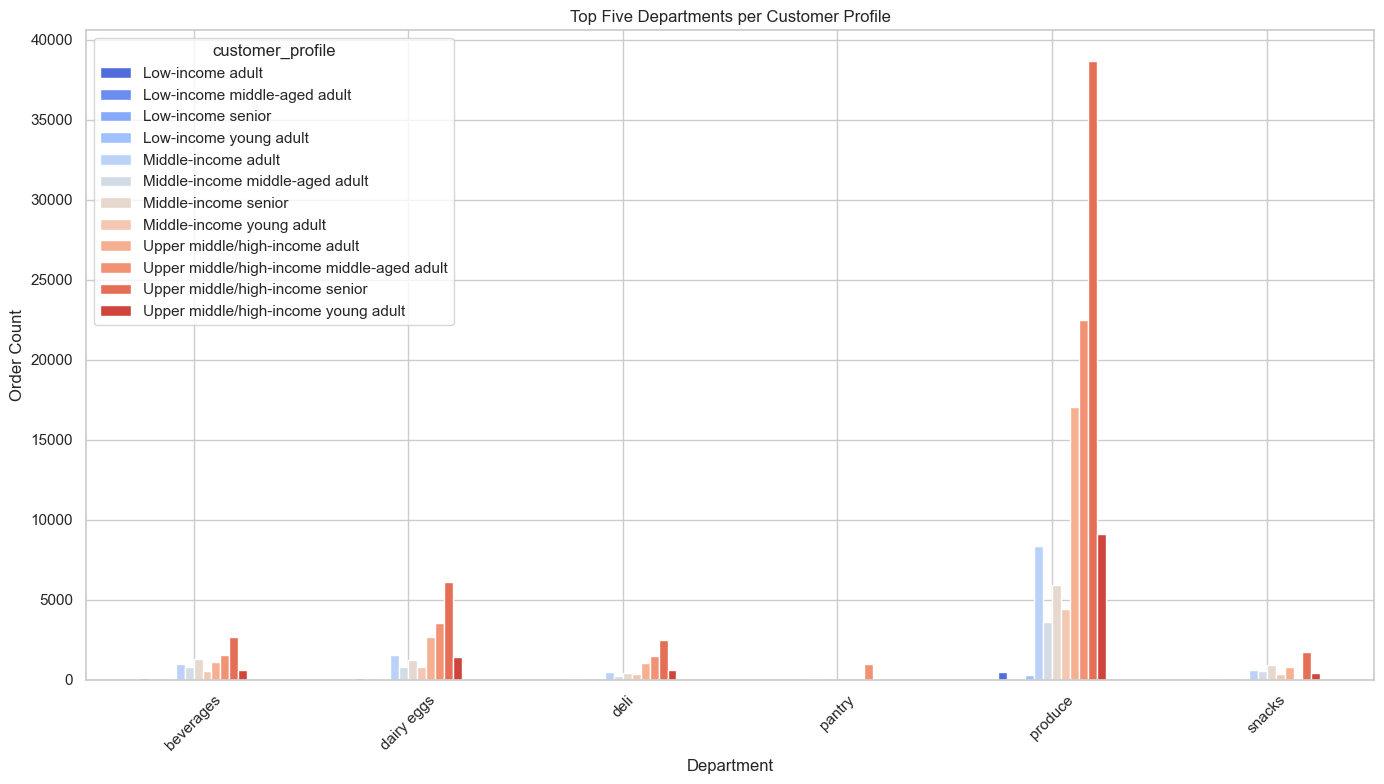

In [40]:
# Ensure the 'customer_profile' column has the correct order
user_sample['customer_profile'] = pd.Categorical(user_sample['customer_profile'], categories=profile_order, ordered=True)

# Pivot the data again to respect the order
top_departments_per_profile_pivot = top_departments_per_profile.pivot(index='department', columns='customer_profile', values='order_count')

# Set the style and palette for Seaborn
sns.set(style="whitegrid")
palette = sns.color_palette('coolwarm', n_colors=len(top_departments_per_profile_pivot.columns))

# Bar Chart for Top Five Departments per Customer Profile
fig, ax = plt.subplots(figsize=(14, 8))
top_departments_per_profile_pivot.plot(kind='bar', ax=ax, color=palette)
ax.set_xlabel('Department')
ax.set_ylabel('Order Count')
ax.set_title('Top Five Departments per Customer Profile')
plt.xticks(rotation=45)

plt.tight_layout()
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_five_departments_per_customer_profile.png'))
plt.show()

### Visualization 5: Top Five Products By Region & Customer Profile

In [42]:
# Calculate the total order count for each product per region
total_orders_per_product_region = user_sample.groupby(['region', 'product_name']).size().reset_index(name='order_count')

In [43]:
# Get the top 5 products for each region
top_products_per_region = total_orders_per_product_region.groupby('region').apply(lambda x: x.nlargest(5, 'order_count')).reset_index(drop=True)

In [44]:
# Pivot the data for plotting
top_products_per_region_pivot = top_products_per_region.pivot(index='product_name', columns='region', values='order_count')

In [45]:
top_products_per_region_pivot

region,Midwest,Northeast,South,West
product_name,,,,
Bag of Organic Bananas,12191,9013,17035,13111
Banana,2308,1640,3227,2458
Organic Avocado,3400,2527,4832,3714
Soda,1619,1235,2374,1776
Strawberries,1796,1254,2475,1887


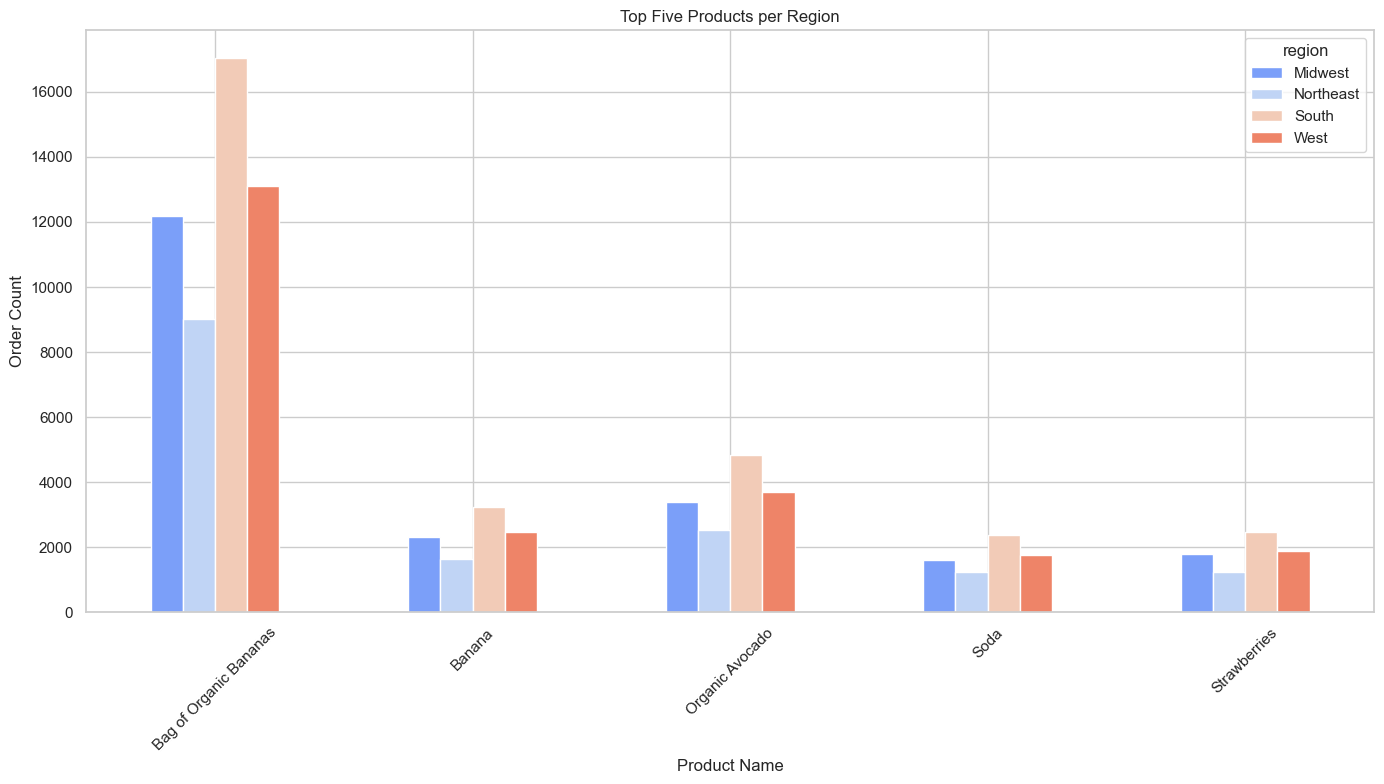

In [46]:
# Set the style and palette for Seaborn
sns.set(style="whitegrid")
palette = sns.color_palette('coolwarm', n_colors=len(top_products_per_region_pivot.columns))

# Bar Chart for Top Five Products per Region
fig, ax = plt.subplots(figsize=(14, 8))
top_products_per_region_pivot.plot(kind='bar', ax=ax, color=palette)
ax.set_xlabel('Product Name')
ax.set_ylabel('Order Count')
ax.set_title('Top Five Products per Region')
plt.xticks(rotation=45)

plt.tight_layout()
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_five_products_per_region.png'))
plt.show()

In [47]:
# Ensure the 'customer_profile' column has the correct order
user_sample['customer_profile'] = pd.Categorical(user_sample['customer_profile'], categories=profile_order, ordered=True)

In [48]:
# Calculate the total order count for each product per customer profile
total_orders_per_product_profile = user_sample.groupby(['customer_profile', 'product_name']).size().reset_index(name='order_count')

/var/folders/79/dbxtn02s0kzdngngl4z03wch0000gp/T/ipykernel_7422/1267640891.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_orders_per_product_profile = user_sample.groupby(['customer_profile', 'product_name']).size().reset_index(name='order_count')


In [49]:
# Get the top 5 products for each customer profile
top_products_per_profile = total_orders_per_product_profile.groupby('customer_profile').apply(lambda x: x.nlargest(5, 'order_count')).reset_index(drop=True)

/var/folders/79/dbxtn02s0kzdngngl4z03wch0000gp/T/ipykernel_7422/1463962922.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products_per_profile = total_orders_per_product_profile.groupby('customer_profile').apply(lambda x: x.nlargest(5, 'order_count')).reset_index(drop=True)


In [50]:
# Pivot the data for plotting
top_products_per_profile_pivot = top_products_per_profile.pivot(index='product_name', columns='customer_profile', values='order_count')

In [51]:
top_products_per_profile_pivot

customer_profile,Low-income adult,Low-income middle-aged adult,Low-income senior,Low-income young adult,Middle-income adult,Middle-income middle-aged adult,Middle-income senior,Middle-income young adult,Upper middle/high-income adult,Upper middle/high-income middle-aged adult,Upper middle/high-income senior,Upper middle/high-income young adult
product_name,,,,,,,,,,,,
Bag of Organic Bananas,216.0,19.0,22.0,108.0,3861.0,1625.0,2541.0,2015.0,7996.0,10550.0,18086.0,4311.0
Banana,43.0,NaN,NaN,NaN,652.0,NaN,NaN,342.0,1537.0,2044.0,3527.0,831.0
Bartlett Pears,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,872.0,1196.0,NaN,502.0
Organic Avocado,NaN,NaN,5.0,29.0,1004.0,311.0,481.0,529.0,2403.0,3027.0,5415.0,1226.0
Organic Half & Half,49.0,2.0,NaN,21.0,NaN,300.0,489.0,NaN,NaN,NaN,2022.0,NaN
Organic Raspberries,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original Beef Jerky,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Soda,93.0,NaN,5.0,31.0,739.0,594.0,978.0,405.0,NaN,NaN,NaN,NaN
Strawberries,47.0,NaN,6.0,27.0,638.0,362.0,550.0,302.0,1066.0,1478.0,2413.0,521.0


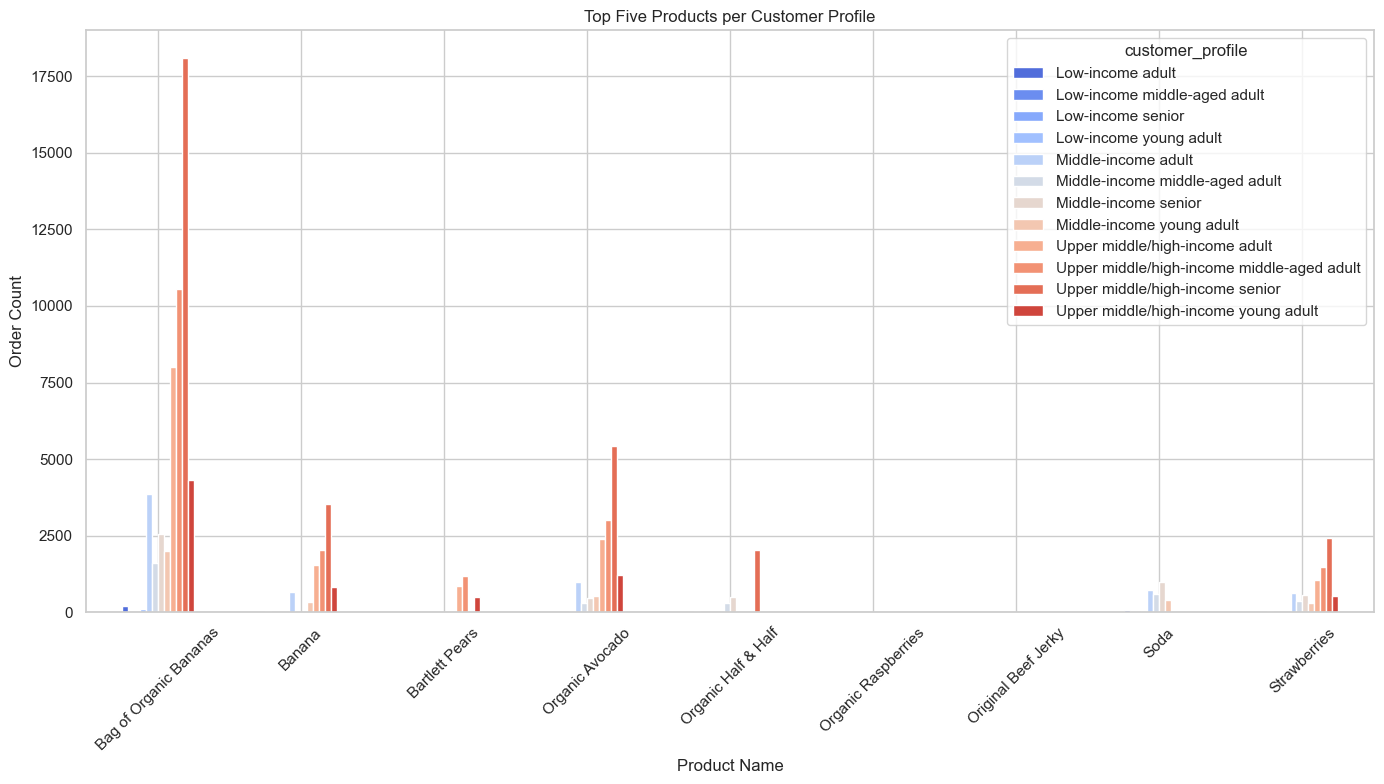

In [52]:
# Set the style and palette for Seaborn
sns.set(style="whitegrid")
palette = sns.color_palette('coolwarm', n_colors=len(top_products_per_profile_pivot.columns))

# Bar Chart for Top Five Products per Customer Profile
fig, ax = plt.subplots(figsize=(14, 8))
top_products_per_profile_pivot.plot(kind='bar', ax=ax, color=palette)
ax.set_xlabel('Product Name')
ax.set_ylabel('Order Count')
ax.set_title('Top Five Products per Customer Profile')
plt.xticks(rotation=45)

plt.tight_layout()
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_five_products_per_customer_profile.png'))
plt.show()

## Final Exports
This has already been done previously for user_sample as final_user_sample_report and keep_customers as final_keep_customers_report.